# Introdução sobre o dataset escolhido

Para rodar o código, precisamos do arquivo avocado.csv em nosso repositório, que pode ser baixado pelo link:

https://www.kaggle.com/neuromusic/avocado-prices



Esse dataset teve suas informações retiradas do website Hass Avocado Board em maio de 2018 e compilado em um arquivo CSV.

Os dados foram recolhidos semanalmente e são referentes aos volumes e preços nos Estados Unidos. De acordo com o website, tais informações são recebidas diretamente dos registros de caixa dos revendedores, baseados em vendas no varejo na atualidade. 

In [ ]:
# bibliotecas utilizadas

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns




O repositório deve ser ajustado para a leitura dos dados dependendo de onde o código está sendo rodado. O caminho para onde o arquivo .csv está deve substituir o conteúdo entre aspas: '/content/avocado.csv'

In [ ]:
# lendo os dados

dataset = pd.read_csv("/content/avocado.csv")

dataset.head(10) # ler as 10 primeiras observações

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


Abaixo podemos ver algumas observações sobre este dataset. Temos 18250 observações para cada uma das 14 colunas.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
dataset.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
# fazendo o python entender que a coluna 'date' fala sobre tempo

dataset['Date'] = pd.to_datetime(dataset['Date'])

dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Pré-processamento 

Realizaremos aqui um conjunto de atividades que envolvem preparação, organização e estruturação dos dados. É uma etapa fundamental que precede a realização do nosso processo de predição. Dividiremos nosso pré-processamento em 3 partes: limpeza, transformação e redução dos dados.

## Limpeza dos dados:

Precisamos assegurar que nosso conjunto de dados não possua partes irrelevantes ou ausentes, uma vez que isso atrapalhará a manipulação dos mesmos. 

In [ ]:
# verificando se existem NaN em nosso dataset:

# Substitui espaços vazios ou com o caracter '?' por NaN, para verificarmos tudo de uma vez:

dataset = dataset.replace('?', np.nan)

dataset = dataset.replace(' ', np.nan)

# Chegagem:

dataset_check=dataset.isnull()

print(dataset_check)

       Unnamed: 0   Date  AveragePrice  ...   type   year  region
0           False  False         False  ...  False  False   False
1           False  False         False  ...  False  False   False
2           False  False         False  ...  False  False   False
3           False  False         False  ...  False  False   False
4           False  False         False  ...  False  False   False
...           ...    ...           ...  ...    ...    ...     ...
18244       False  False         False  ...  False  False   False
18245       False  False         False  ...  False  False   False
18246       False  False         False  ...  False  False   False
18247       False  False         False  ...  False  False   False
18248       False  False         False  ...  False  False   False

[18249 rows x 14 columns]


Como vemos acima, não possuimos nenhuma linha com NaN, logo, não será necessário realizar a limpeza. Caso houvesse, o código deveria nos retornar True nas linhas em que NaN aparece.

Caso esse resultado tivesse sido diferente, poderíamos realizar a limpeza a partir do código abaixo: 
É necessário ressaltar que tal código não alterará nosso dataset, uma vez quem não existem NaN nele.

In [ ]:
# remove as linhas com NaN (not a number)

dataset = dataset.dropna() 
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
# Verificação se existem linhas duplicadas:

# Retorna True na posição em que há uma linha duplicada

dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18244    False
18245    False
18246    False
18247    False
18248    False
Length: 18249, dtype: bool

Pelo mesmo processo anterior, mesmo não possuindo linhas duplicadas, podemos realizar o processo de limpeza por razões demonstrativas - uma vez que não alterará nosso dataset.

In [ ]:
# Remove as linhas duplicadas

dataset = dataset.drop_duplicates()
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Redução dos dados:

Como vamos trabalhar apenas com cidades, precisamos excluir as regiões do nosso dataset, para não trabalharmos com dados repetidos. Podemos visualizar todas as regiões abaixo:

In [ ]:
dataset.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [ ]:
# deletando as regiões:

regioes_retirar_1 = dataset[ dataset['region'] == 'TotalUS' ].index
regioes_retirar_2 = dataset[ dataset['region'] == 'Midsouth' ].index
regioes_retirar_3 = dataset[ dataset['region'] == 'Northeast' ].index
regioes_retirar_4 = dataset[ dataset['region'] == 'SouthCentral' ].index
regioes_retirar_5 = dataset[ dataset['region'] == 'Southeast' ].index
regioes_retirar_6 = dataset[ dataset['region'] == 'West' ].index


dataset.drop(regioes_retirar_1 , inplace=True)
dataset.drop(regioes_retirar_2 , inplace=True)
dataset.drop(regioes_retirar_3 , inplace=True)
dataset.drop(regioes_retirar_4 , inplace=True)
dataset.drop(regioes_retirar_5 , inplace=True)
dataset.drop(regioes_retirar_6 , inplace=True)

dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Verificando se as regiões foram realmente deletadas:

In [ ]:
dataset.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Nashville', 'NewOrleansMobile', 'NewYork', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'Sacramento', 'SanDiego', 'SanFrancisco', 'Seattle',
       'SouthCarolina', 'Spokane', 'StLouis', 'Syracuse', 'Tampa',
       'WestTexNewMexico'], dtype=object)

Para a nossa regressão, precisaremos apenas das colunas das datas e do preço médio. Então, faremos a redução dos dados para que seja mais fácil manipulá-los, com apenas essas duas colunas. É interessante ressaltar que manteremos o conjunto original em uma variável para caso seja necessário posteriormente recorrer a outras covariáveis.

Removendo as colunas que não iremos utilizar:

In [ ]:

# Remove as linhas especificadas

data_original = dataset

dataset = dataset.drop(dataset.columns[[0,3,4,5,6,7,8,9,10,11,12,13]], axis=1)

dataset.head()


,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28


## Exluindo Outliers

fonte: https://www.youtube.com/watch?v=Vc4cXIAa69Y

In [ ]:
dataset.shape

(18249, 2)

In [ ]:
dataset.describe()

,AveragePrice
count,18249.000000
mean,1.405978
std,0.402677
min,0.440000
25%,1.100000
50%,1.370000
75%,1.660000
max,3.250000


In [ ]:
# define uma função chamada "plot_boxplot"

def plot_boxplot(df, col):
  df.boxplot(column=[col])
  plt.grid(False)
  plt.show()

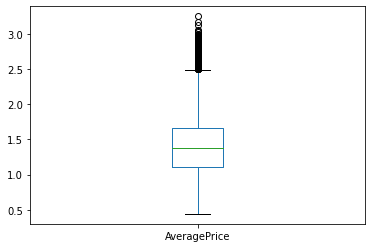

In [ ]:
plot_boxplot(dataset, "AveragePrice")

In [ ]:
# define uma função chamada "outliers" que retorna uma lista de index de outliers
# IQR = Q3 - Q1
# +/- 1.5*IQR

def outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df.index[ (df[col] < lower_bound) | (df[col] > upper_bound) ]

  return ls

In [ ]:
# cria uma lista vazia para armazenar os indices capturados das várias colunas

index_list = []

index_list.extend(outliers(dataset, 'AveragePrice'))

In [ ]:
index_list

[11314,
 11320,
 11321,
 11322,
 11323,
 11324,
 11325,
 11326,
 11327,
 11328,
 11329,
 11330,
 11331,
 11332,
 12254,
 12819,
 12821,
 12823,
 12824,
 13033,
 13035,
 13037,
 13038,
 13395,
 13657,
 13661,
 13813,
 14016,
 14017,
 14018,
 14019,
 14020,
 14072,
 14073,
 14074,
 14117,
 14118,
 14119,
 14120,
 14121,
 14122,
 14123,
 14124,
 14125,
 14126,
 14128,
 14129,
 14177,
 14385,
 14394,
 14697,
 14699,
 14701,
 14702,
 14806,
 14807,
 14808,
 14809,
 14810,
 14811,
 14812,
 14911,
 14912,
 14913,
 14914,
 14915,
 14916,
 14917,
 14918,
 14919,
 15031,
 15032,
 15033,
 15034,
 15036,
 15077,
 15124,
 15125,
 15126,
 15127,
 15128,
 15129,
 15130,
 15143,
 15147,
 15148,
 15510,
 15511,
 15667,
 15668,
 15669,
 15671,
 15672,
 15673,
 15674,
 15675,
 15676,
 15680,
 15684,
 15812,
 15814,
 15815,
 15816,
 15870,
 15871,
 16024,
 16050,
 16054,
 16055,
 16395,
 16399,
 16421,
 16660,
 16661,
 16662,
 16663,
 16664,
 16665,
 16666,
 16667,
 16668,
 16713,
 16714,
 16715,
 16717,


In [ ]:
# define uma função chamada "remove" que retorna um dataframe limpo sem os outliers

def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [ ]:
df_cleaned = remove(dataset, index_list)

In [ ]:
df_cleaned.shape

(18040, 2)

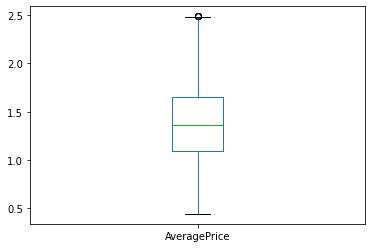

In [ ]:
plot_boxplot(df_cleaned, 'AveragePrice')

In [ ]:
dataset_limpo = df_cleaned

In [ ]:
dataset_limpo.describe()

,AveragePrice
count,18040.000000
mean,1.390967
std,0.379588
min,0.440000
25%,1.090000
50%,1.360000
75%,1.650000
max,2.490000


## Transformação dos dados:

Executaremos esse processo para transformar os dados originais em formatos mais apropriados e adequados para o processo de mineração. Para facilitar nossa regressão, realizaremos os processos principais de tranformação, para que, caso seja necessário posteriormente, já teremos o código pronto.

### Normalização e padronização

A normalização é feita para dimensionar os valores dos dados em um intervalo especificado, no caso, [0,1].

In [ ]:

X = np.array(dataset[dataset.columns])
for i  in range(X.shape[1]):
    print("Maior valor da coluna:", i, ":", max(X[:,i]))
    print("Menor Valor da coluna:", i, ":", min(X[:,i]))
# prepara a função para transformar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
# Realiza a normalização e coloca em um novo vetor

# não temos como fazer a normalização com datas, então essa coluna é excluída
X = np.array(dataset[dataset.columns[1:]])

X_norm = scaler.fit_transform(X)

print()
print(X_norm)

Maior valor da coluna: 0 : 2018-03-25 00:00:00
Menor Valor da coluna: 0 : 2015-01-04 00:00:00
Maior valor da coluna: 1 : 3.25
Menor Valor da coluna: 1 : 0.44

[[0.31672598]
 [0.32384342]
 [0.17437722]
 ...
 [0.5088968 ]
 [0.53024911]
 [0.41992883]]


In [ ]:
print('Mínimo dos atributos:', np.amin(X_norm, axis=0))
print('Máximo dos atributos:', np.amax(X_norm, axis=0))

Mínimo dos atributos: [0.]
Máximo dos atributos: [1.]


Para realizarmos a padronização dos dados, de forma que os atributos apresentem média igual a zero e variância igual a 1, o procedimento é parecido.

In [ ]:

X = np.array(dataset[dataset.columns[1:]])
# prepara a função para transformar os dados
scaler = StandardScaler().fit(X)
# realiza a padronização (média=0, variância = 1)
rescaledX = scaler.transform(X)
print(rescaledX)

[[-0.18868864]
 [-0.13901962]
 [-1.18206895]
 ...
 [ 1.15237477]
 [ 1.30138182]
 [ 0.53151208]]


Vamos verificar se cada coluna apresenta média igual a zero e desvio padrão igual a um.

In [ ]:
for i in np.arange(0,rescaledX.shape[1]):
    print('Media da coluna', i, 'é igual a: ', np.mean(rescaledX[:,i]))
    print('Desvio padrão da coluna', i, 'é igual a: ', np.std(rescaledX[:,i]),'\n')

Media da coluna 0 é igual a:  1.4951417093094333e-16
Desvio padrão da coluna 0 é igual a:  0.9999999999999999 



### Conversão de variáveis nominais em inteiros

É o processo de transferência de funções contínuas, modelos, variáveis e equações em contrapartes discretas. Isso é importante, pois alguns algoritmos só trabalham com entradas de valores discretos, não conseguindo prever valores contínuos. A discretização cria um número limitado de possíveis estados.

In [ ]:
# armazena o nome das classes
classes = np.unique(dataset[dataset.columns[-1]])
number = 0 # valor que será usado para representar a clases
for i in classes:
    dataset = dataset.replace(i, number) # substitui cada valor da classe por number
    number = number + 1
print('Novos dados:')
print(dataset[dataset.columns[-1]])

Novos dados:
0         86.0
1         88.0
2         46.0
3         61.0
4         81.0
         ...  
18244    116.0
18245    124.0
18246    140.0
18247    146.0
18248    115.0
Name: AveragePrice, Length: 18249, dtype: float64


### Binarização dos dados

Seguindo a mesma lógica do item anterior - a discretização -, a binarização converte atributos contínuos ou discretos em binários. 

In [ ]:

X = np.array(dataset[dataset.columns[1:]], dtype = float)
T = 0.2 # valor do limiar
print('Limiar:', T)
print('---------------------')

# prepara a normalização dos dados
scaler = MinMaxScaler(feature_range=(0, 1))
# realiza a normalização
X_pad = scaler.fit_transform(X)
# faz a binarização considerando o limiar (threshold)
binarizer = Binarizer(threshold=T).fit(X_pad)
binaryX = binarizer.transform(X_pad)
for i in np.arange(0,X_pad.shape[0]):
    print("Antes:", X_pad[i,])
    print('Depois:',binaryX[i,])
    print('---------------------')

A saída de streaming foi truncada nas últimas 5000 linhas.
Depois: [1.]
---------------------
Antes: [0.39922481]
Depois: [1.]
---------------------
Antes: [0.3875969]
Depois: [1.]
---------------------
Antes: [0.37984496]
Depois: [1.]
---------------------
Antes: [0.37209302]
Depois: [1.]
---------------------
Antes: [0.36434109]
Depois: [1.]
---------------------
Antes: [0.37984496]
Depois: [1.]
---------------------
Antes: [0.36434109]
Depois: [1.]
---------------------
Antes: [0.36046512]
Depois: [1.]
---------------------
Antes: [0.37209302]
Depois: [1.]
---------------------
Antes: [0.36046512]
Depois: [1.]
---------------------
Antes: [0.3875969]
Depois: [1.]
---------------------
Antes: [0.37984496]
Depois: [1.]
---------------------
Antes: [0.39922481]
Depois: [1.]
---------------------
Antes: [0.4496124]
Depois: [1.]
---------------------
Antes: [0.48837209]
Depois: [1.]
---------------------
Antes: [0.46511628]
Depois: [1.]
---------------------
Antes: [0.47674419]
Depois: [

## Correlação

In [ ]:
corr = dataset.corr()
print(corr)

NameError: ignored

# Análise exploratória

Com a análise exploratória, poderemos visualizar nossos dados utilizando recursos estatísticos para entendermos melhor sobre o comportamento dos mesmos.

Histograma da distribuição dos preços dos abacates:

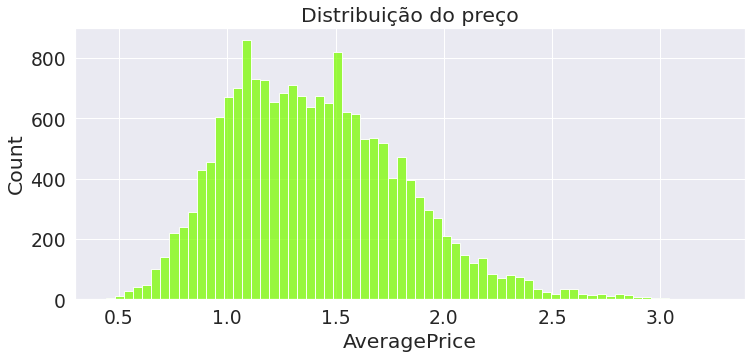

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribuição do preço")
ax = sns.histplot(dataset["AveragePrice"], color = '#7CFC00')

Gráfico de linhas das distribuição do preço dos abacates durante o período observado:

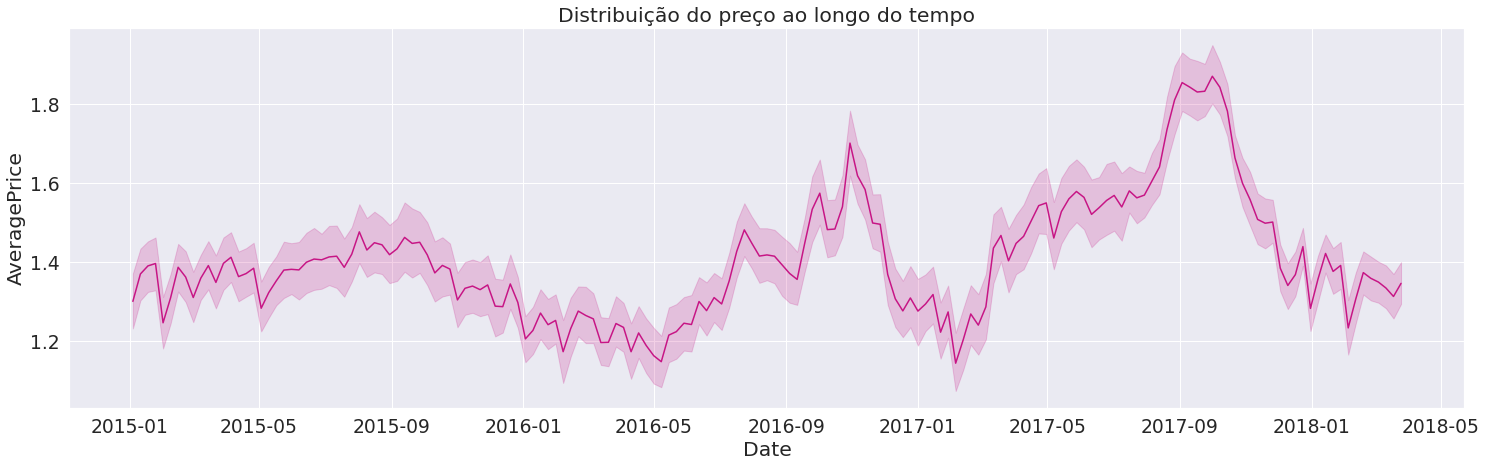

In [ ]:
plt.figure(figsize=(25,7))
plt.title("Distribuição do preço ao longo do tempo")
sns.lineplot(x="Date", y="AveragePrice", data=dataset, color = '#C71585')
plt.show()

# Extração de padrões 

https://github.com/franciscoicmc/ciencia-de-dados/blob/master/Aula7-Regressao-Linear-Simples.ipynb

https://www.kaggle.com/tanyildizderya/weekly-corn-price-prediction-w-lstm-prophet-arima

https://colab.research.google.com/drive/1n3PVnHXD1EpRvtM81esVClNmXjd5fmgL?usp=sharing

## Com regressão linear

### Gráfico com todos os dados (train + test)

In [ ]:
import plotly.express as px

fig = px.scatter(dataset, x="Date", y="AveragePrice", title='Price Time Series')
fig.show();

## Com Regressão Linear


### Separação de dados para Teste e para Treinamento

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

x_trainRL, x_testRL, y_trainRL, y_testRL = train_test_split(X, Y, test_size=0.3, random_state=0)

### Converte o eixo X (Data) para um tipo de dado reconhecível pela biblioteca

In [ ]:
import datetime as dt
x_testRL.columns = ["Date"]
x_testRL['Date'] = pd.to_datetime(x_testRL['Date'])
x_testRL['Date']=x_testRL['Date'].map(dt.datetime.toordinal)

x_trainRL.columns = ["Date"]
x_trainRL['Date'] = pd.to_datetime(x_trainRL['Date'])
x_trainRL['Date']=x_trainRL['Date'].map(dt.datetime.toordinal)

### Treinamento do modelo

In [ ]:
import sklearn.linear_model as lm

regressor = lm.LinearRegression()
regressor.fit(x_trainRL, y_trainRL)

LinearRegression()

### Predição

In [ ]:
y_predRL = regressor.predict(x_testRL)

### Gráfico da predição com os dados treinados

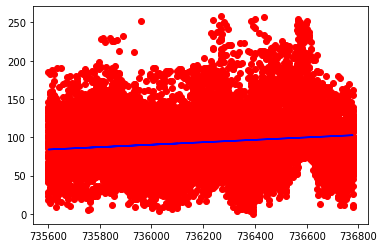

In [ ]:
plt.scatter (x_trainRL, y_trainRL, color='red')
plt.plot(x_trainRL, regressor.predict(x_trainRL), color='blue', scaley=False)
plt.show()

### Gráfico da predição com os dados de teste

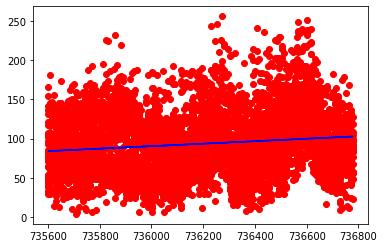

In [ ]:
plt.scatter (x_testRL, y_testRL, color='red')
plt.plot(x_trainRL, regressor.predict(x_trainRL), color='blue', scaley=False)
plt.show()

### Observações
Percebe-se que a função gerada não descreve de forma ideal a periodicidade de preços influenciada pela estação do ano e épocas de colheita.

## Com o fbprophet

### Separação de dados para Teste e para Treinamento


In [ ]:
train, test = train_test_split(dataset, test_size=0.3, random_state=0)

### Treinamento do modelo 

In [ ]:
# Utiliza-se do modelo de predicao da biblioteca fbprophet
from fbprophet import Prophet
train = train.rename(columns={'Date':'ds', 'AveragePrice':'y'})
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


###Predição

In [ ]:
# Seta para prever 365 dias no futuro
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

### Gráfico da predição com os dados treinados

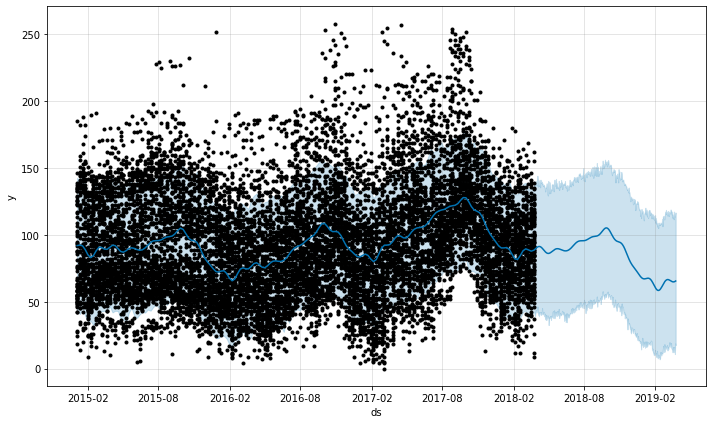

In [ ]:
# Mostra a previsão de preços para os próximos 365 dias
fig1 = model.plot(forecast)

#### Gráfico da predição com os dados de teste

In [ ]:
import plotly.graph_objects as go

y_pred = forecast['yhat'].values
figPredTest = px.scatter(test, x="Date", y="AveragePrice")
figPredTest.add_trace(go.Scatter(x=forecast['ds'], y=y_pred, mode='markers'))
figPredTest.show()

            Date  AveragePrice
9181  2015-12-06         101.0
1013  2015-07-05          58.0
14625 2016-03-20          80.0
15234 2017-09-10         168.0
18247 2018-01-14         146.0
...          ...           ...
17389 2017-01-08         123.0
16636 2017-03-26         104.0
7645  2017-09-17          97.0
11356 2015-02-08          88.0
3016  2016-12-25          81.0

[5475 rows x 2 columns]


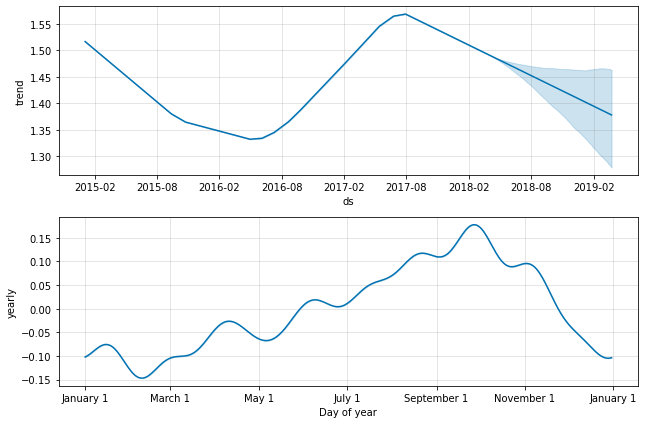

In [ ]:
# Gráfico de tendência e anual
fig2 = model.plot_components(forecast)

# Pós-Processamento

### Filtro de informações

Foi possível dispensar a necessidade de mais filtros ou limpeza do resultado a partir do trabalho realizado principalmente na etapa de `Redução`, do `pré-processamento`. O formato resultante dos dados é de fácil compreensão e operabilidade para o usuário final. 

### Interpretação e explicação

Pudemos observar que, como o esperado, preço do abacate está fortemente relacionado a época do ano e a sua safra em questão. Isso adiciona um teor consideravel de imprevisibilidade sobre o preço. O resultado observado a partir dos modelos treinados também indiciam a tendência sazonal do preço do abacate.

### Integração

É possivel utilizar os dados resultantes como input de em um sistema que realiza tomadas de decisão . 